# **Importa√ß√£o de Bibliotecas e dataset**


---


Nesta sec√ß√£o, s√£o importadas as bibliotecas utilizadas no projeto, assim como realizada a ingest√£o de um ficheiro CSV com o conte√∫do de an√°lise do projeto, carregado para um DataFrame utilizando a biblioteca Pandas.


In [67]:
# Importa√ß√£o Bibliotecas
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Importar dados para dataframe
df = pd.read_csv("/content/Projeto _ Life Expectancy Data.csv")

# **An√°lise Explorat√≥ria de Dados**


---

Foi realizada uma pequena an√°lise macro ao DataFrame para compreender a representa√ß√£o dos dados.

### An√°lise estrutura dataset.


---





O conjunto de dados (dataset) √© composto por 2938 linhas e 22 colunas.

Atrav√©s da fun√ß√£o info(), √© poss√≠vel visualizar os tipos de dados das vari√°veis que constituem o DataFrame.

In [69]:
# Analisar primeiras linhas do dataframe
print(df.head())

# Analisar o tipo de dados de cada elemento do dataframe
print(df.info())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

### Valores em falta no dataset.

Foi tamb√©m poss√≠vel verificar que existem algumas colunas com aus√™ncia de valores, nomeadamente:

    -Population: 652 valores;
    -Hepatitis B: 553 valores;
    -GDP: 448 valores;
    -Total expenditure: 226 valores;
    -Alcohol: 194 valores;
    -Income composition of resources: 167 valores;
    -Schooling: 163 valores;
    -BMI : 34 valores;
    -thinness 1-19 years: 34 valores;
    -thinness 5-9 years: 34 valores;
    -Polio: 19 valores;
    -iphtheria : 19 valores;
    -Life expectancy : 10 valores;
    -Adult Mortality: 10 valores;


*   Population: 652 valores;
*   Hepatitis B: 553 valores;
*   GDP: 448 valores;
*   Total expenditure: 226 valores;
*   Alcohol: 194 valores;
*   Income composition of resources: 167 valores;
*   Schooling: 163 valores;
*    BMI : 34 valores;
*    thinness  1-19 years: 34 valores;
*    thinness 5-9 years: 34 valores;
*   Polio: 19 valores;
*   Diphtheria : 19 valores;
*   Life expectancy : 10 valores;
*   Adult Mortality: 10 valores;


<Axes: >

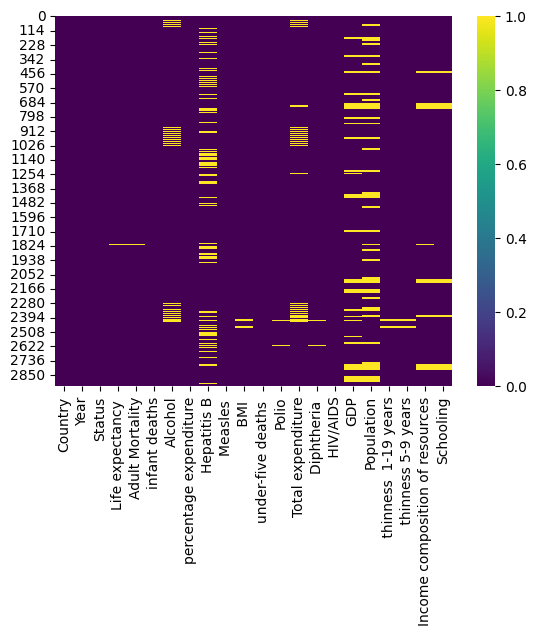

In [70]:
# Obten√ß√£o de variaveis com aus√™ncia de valores ordenada de forma descendente
missing_values = df.isnull().sum()
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_list = [f"*   {col}: {val} valores;" for col, val in missing_values_sorted.items()]

# Apresentar lista de valores ausentes
formatted_missing_values = "\n".join(missing_values_list)
print(formatted_missing_values)

# Apresentar variaveis com aus√™ncia de valores visualmente
sns.heatmap(df.isna(), cmap='viridis')

## An√°lise descritiva geral


---

"Os dados da amostra abrangem uma s√©rie de vari√°veis relacionadas com sa√∫de, economia e demografia. Seguem-se as principais observa√ß√µes:

O dataset est√° representado temporalmente ao longo de 15 anos, desde o ano 2000 at√© 2015.










In [71]:
# Pequena An√°lise Descritiva √†s vari√°veis do dataset
#Variaveis Nominais
print(df.describe(include="O").T)
#Variaveis Numericas
print(df.describe().T)

        count unique          top  freq
Country  2938    193  Afghanistan    16
Status   2938      2   Developing  2426
                                  count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure           

### 1. Contagem n¬∫ de Registos por Estado de Desenvolvimento de Pa√≠s



---


De acordo com o Fundo Monet√°rio Internacional (FMI), a popula√ß√£o mundial est√° distribu√≠da de forma desigual entre pa√≠ses desenvolvidos e em desenvolvimento. Aproximadamente 85% da popula√ß√£o global vive em pa√≠ses em desenvolvimento. O dataset analisado reflete, de forma aproximada, as propor√ß√µes acima referidas, com 17% da popula√ß√£o representada por pa√≠ses desenvolvidos e 83% por pa√≠ses em desenvolvimento."

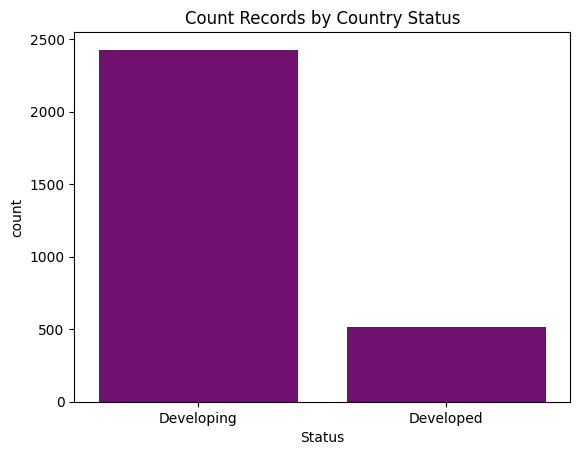

In [72]:
# 1.Contagem n¬∫ de Registos por Estado de Desenvolvimento de Pa√≠s
sns.countplot(x='Status', data=df,color='purple')
plt.title('Count Records by Country Status')
plt.show()

### 2. Distribui√ß√£o Gasto sa√∫de como percentagem do PIB per capita


---



O gr√°fico no output apresenta a distribui√ß√£o do gasto em sa√∫de como percentagem do PIB per capita. Observa-se que a maior parte dos dados est√° concentrada em valores muito baixos, com uma longa cauda √† direita, indicando uma distribui√ß√£o assim√©trica. Portanto os valores n√£o est√£o uniformemente distribu√≠dos em torno da m√©dia, a longa cauda √† direita sugere que h√° alguns pa√≠ses ou observa√ß√µes com gastos em sa√∫de, como percentagem do PIB per capita, muito superiores √† maioria dos valores dos restantes pa√≠ses.

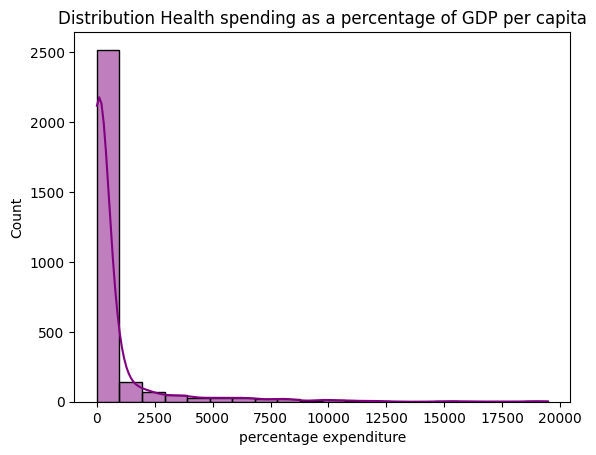

In [73]:
# 2.Distribui√ß√£o Gasto sa√∫de como percentagem do PIB per capita
sns.histplot(df['percentage expenditure'], bins=20, kde=True,color='purple')
plt.title('Distribution Health spending as a percentage of GDP per capita')
plt.show()

### 3. Evolu√ß√£o Distribui√ß√£o Esperan√ßa de Vida ao longo dos Anos


---



Analisando a distribui√ß√£o da vari√°vel 'Esperan√ßa de Vida' ao longo dos anos, com base nos gr√°ficos abaixo, observa-se uma melhoria geral na esperan√ßa de vida global ao longo do per√≠odo analisado (2000-2015). Nos anos mais recentes, a distribui√ß√£o mostra-se mais homog√©nea.

De acordo com os dados amostrais, nota-se que a esperan√ßa m√©dia de vida tem vindo a aumentar consistentemente. Este aumento √© evidente no deslocamento das distribui√ß√µes para a direita (valores mais elevados) ao longo dos anos.







A esperan√ßa m√©dia de vida global √© de 69,22 anos, variando entre 36,3 anos (provavelmente em pa√≠ses com maiores problemas de sa√∫de) e 89 anos.

A mediana, com um valor de 72,1 anos, indica que metade dos pa√≠ses apresenta uma expectativa de vida superior √† m√©dia.

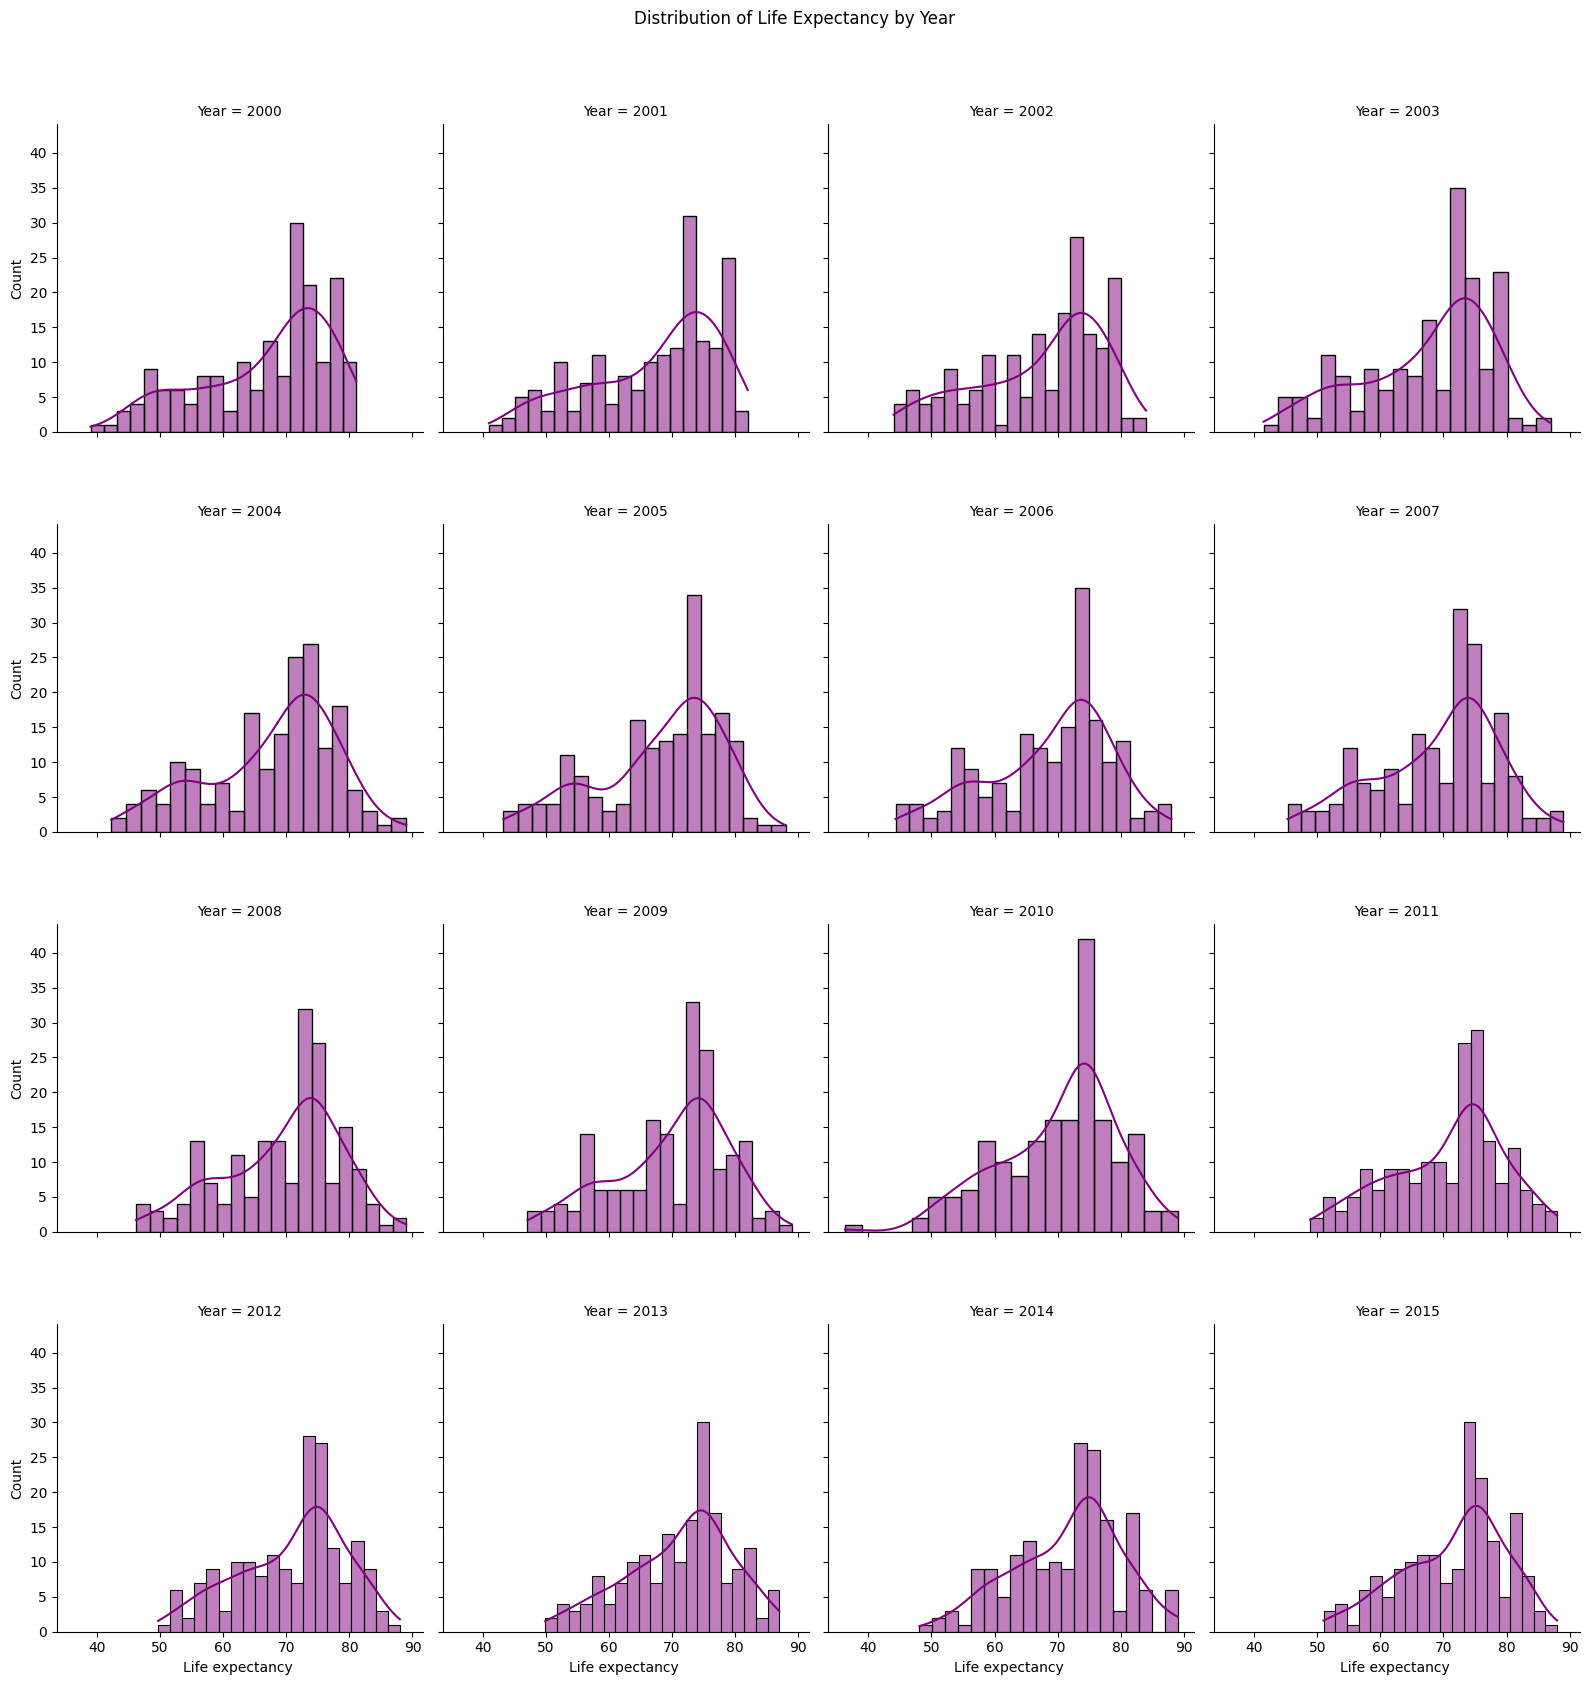

In [74]:
# 3. Evolu√ß√£o Distribui√ß√£o Esperan√ßa de Vida por ano
g = sns.FacetGrid(df, col="Year", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Life expectancy ", bins=20, kde=True,color='purple')
g.fig.suptitle('Distribution of Life Expectancy by Year', y=1.05)
g.fig.subplots_adjust(hspace=0.3)
plt.show()


## 4. Compara√ß√£o esperan√ßa de vida em pa√≠ses desenvolvidos e em desenvolvimento

---

Analisando a distribui√ß√£o da vari√°vel 'Esperan√ßa de Vida' por meio da vari√°vel 'Status' no gr√°fico Box Plot, observa-se que, de acordo com a amostra, os pa√≠ses desenvolvidos apresentam uma maior esperan√ßa de vida, com uma distribui√ß√£o mais concentrada em torno de valores elevados.

Nos pa√≠ses desenvolvidos, a esperan√ßa de vida m√©dia √© de 79,20 anos, com uma menor variabilidade (desvio padr√£o de 3,93 anos), indicando uma distribui√ß√£o mais homog√©nea em torno de valores elevados. O intervalo interquartil varia entre 76,8 e 81,7 anos, com um m√≠nimo de 69,9 anos e um m√°ximo de 89 anos.

J√° nos pa√≠ses em desenvolvimento, a esperan√ßa de vida m√©dia √© de 67,11 anos, apresentando uma maior variabilidade (desvio padr√£o de 9,01 anos). O intervalo interquartil situa-se entre 61,1 e 74 anos, com valores m√≠nimos de 36,3 anos (indicando pa√≠ses em maior dificuldade) e m√°ximos tamb√©m de 89 anos, provavelmente em pa√≠ses que se aproximam de condi√ß√µes de pa√≠ses desenvolvidos.

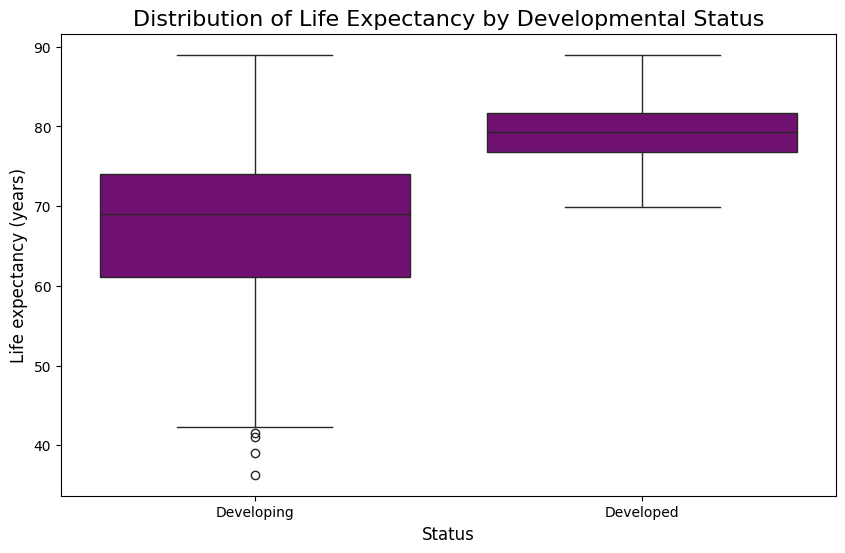

Status
Developed     3.930942
Developing    9.006092
Name: Life expectancy , dtype: float64
            0.25  0.75   IQR
Status                      
Developed   76.8  81.7   4.9
Developing  61.1  74.0  12.9


In [75]:
# 4.Compara√ß√£o esperan√ßa de vida em pa√≠ses desenvolvidos e em desenvolvimento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df, color='purple')
plt.title('Distribution of Life Expectancy by Developmental Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Life expectancy (years)', fontsize=12)
plt.show()

# 4.1 Calcular o desvio padr√£o por variavel "Status"
filtered_data_status_life_expectancy = df[['Status', 'Life expectancy ']].dropna()
std_dev_per_status = filtered_data_status_life_expectancy.groupby('Status')['Life expectancy '].std()
print(std_dev_per_status)

# 4.2 Calcular os quartis (25¬∫ e 75¬∫) para cada Status
iqr_per_status = filtered_data_status_life_expectancy.groupby('Status')['Life expectancy '].quantile([0.25, 0.75]).unstack()
iqr_per_status['IQR'] = iqr_per_status[0.75] - iqr_per_status[0.25]
# Exibir intervalo interquartil
print(iqr_per_status)

### 5. Rela√ß√£o entre PIB  (GDP) e Esperan√ßa de Vida


---


No gr√°fico do output seguinte, 'Rela√ß√£o entre PIB e Esperan√ßa M√©dia de Vida', observa-se uma tend√™ncia positiva: √† medida que o PIB per capita aumenta, a esperan√ßa de vida tende a ser maior.

Os pa√≠ses desenvolvidos apresentam um PIB per capita mais elevado e uma esperan√ßa de vida concentrada na faixa superior (acima dos 75 anos). Por outro lado, os pa√≠ses em desenvolvimento, com PIB mais baixo, exibem uma maior dispers√£o nos valores da esperan√ßa de vida.

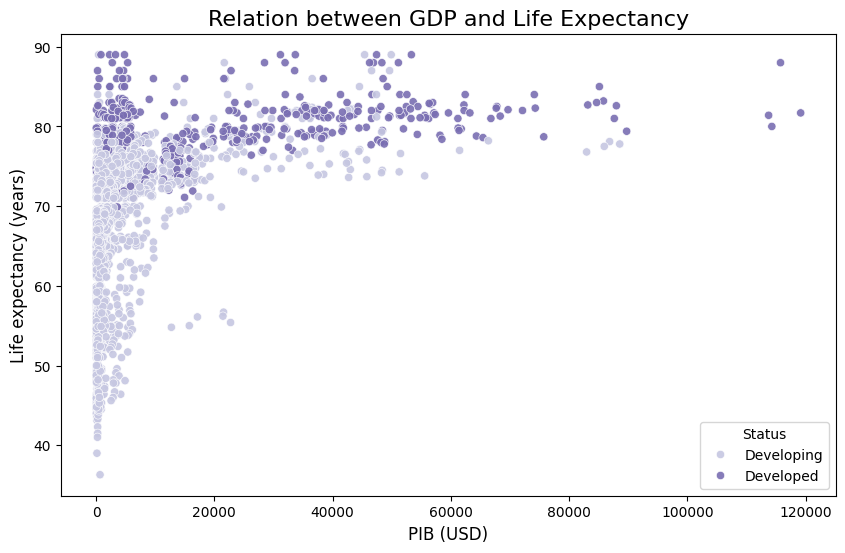

In [76]:
# 5.Rela√ß√£o entre PIB per capita (GDP) e Esperan√ßa de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', hue='Status', data=df, palette='Purples', alpha=0.9)
plt.title('Relation between GDP and Life Expectancy', fontsize=16)
plt.xlabel('PIB (USD)', fontsize=12)
plt.ylabel('Life expectancy (years)', fontsize=12)
plt.legend(title='Status')
plt.show()

### 6. Correla√ß√£o entre vari√°veis saude e socioeconomicas


---

No gr√°fico de Matriz de correla√ß√£o de variaveis apresentado no output, confirmamos que existem vari√°veis socioecon√≥micas, como PIB, educa√ß√£o e gasto em sa√∫de, est√£o fortemente associadas a melhores indicadores de sa√∫de, como maior esperan√ßa de vida e menor mortalidade adulta.


Fortes correla√ß√µes positivas com a Esperan√ßa de Vida:

Educa√ß√£o  apresenta a correla√ß√£o mais forte com a esperan√ßa de vida (
ùëü=0.75). Isto sugere que pa√≠ses com maior n√≠vel de escolaridade tendem a ter melhores indicadores de sa√∫de.
√çndice de Massa Corporal e PIB tamb√©m mostram correla√ß√µes positivas com a esperan√ßa de vida (ùëü=0.57 e ùëü=0.46, respetivamente). Isto sugere que melhores condi√ß√µes econ√≥micas e uma sa√∫de f√≠sica equilibrada poder√£o estar relacionadas com maior longevidade.

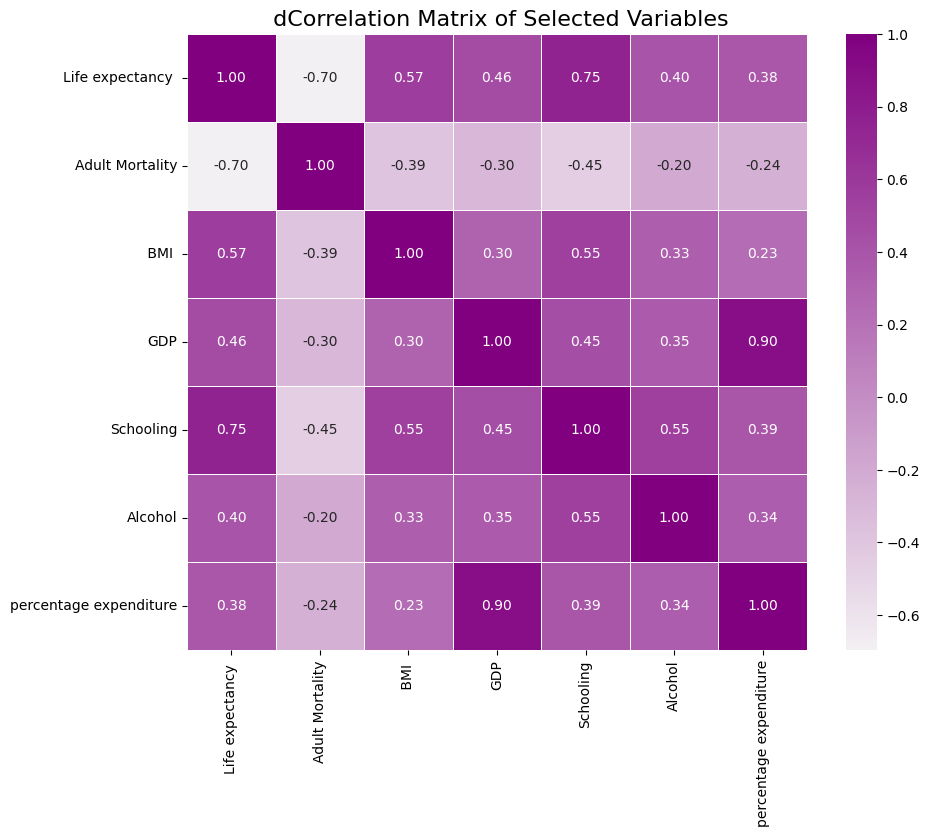

In [77]:
# 6.Correla√ß√£o entre vari√°veis saude e socioeconomicas
purple_cmap = sns.light_palette("purple", as_cmap=True)

correlation_features = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'GDP',
'Schooling', 'Alcohol', 'percentage expenditure']
correlation_matrix = df[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=purple_cmap, fmt=".2f", linewidths=0.5)
plt.title(' dCorrelation Matrix of Selected Variables', fontsize=16)
plt.show()

## Tratamento dos Dados


---



As vari√°veis 'Esperan√ßa de Vida' e 'PIB' foram selecionadas por serem necess√°rias para os testes estat√≠sticos apresentados nos pontos seguintes. Ambas as vari√°veis, segundo a amostra, t√™m vindo a crescer ao longo dos anos. Assim, decidi, em primeiro lugar, apurar os valores em falta atrav√©s dos seguintes m√©todos:


1.   Interpola√ß√£o Temporal: Preencher os valores ausentes com base numa interpola√ß√£o, capturando tend√™ncias temporais dentro de cada pa√≠s;
2.   M√©dia Agrupada por Ano/N√≠vel de Desenvolvimento: Caso o m√©todo anterior n√£o preencha todos os valores em falta, este m√©todo mais simples aplicar√° a m√©dia da vari√°vel, agrupada por ano e n√≠vel de desenvolvimento do pa√≠s.


### Informa√ß√£o Visual de Valores em falta das variaveis referidas antes do tratamento.

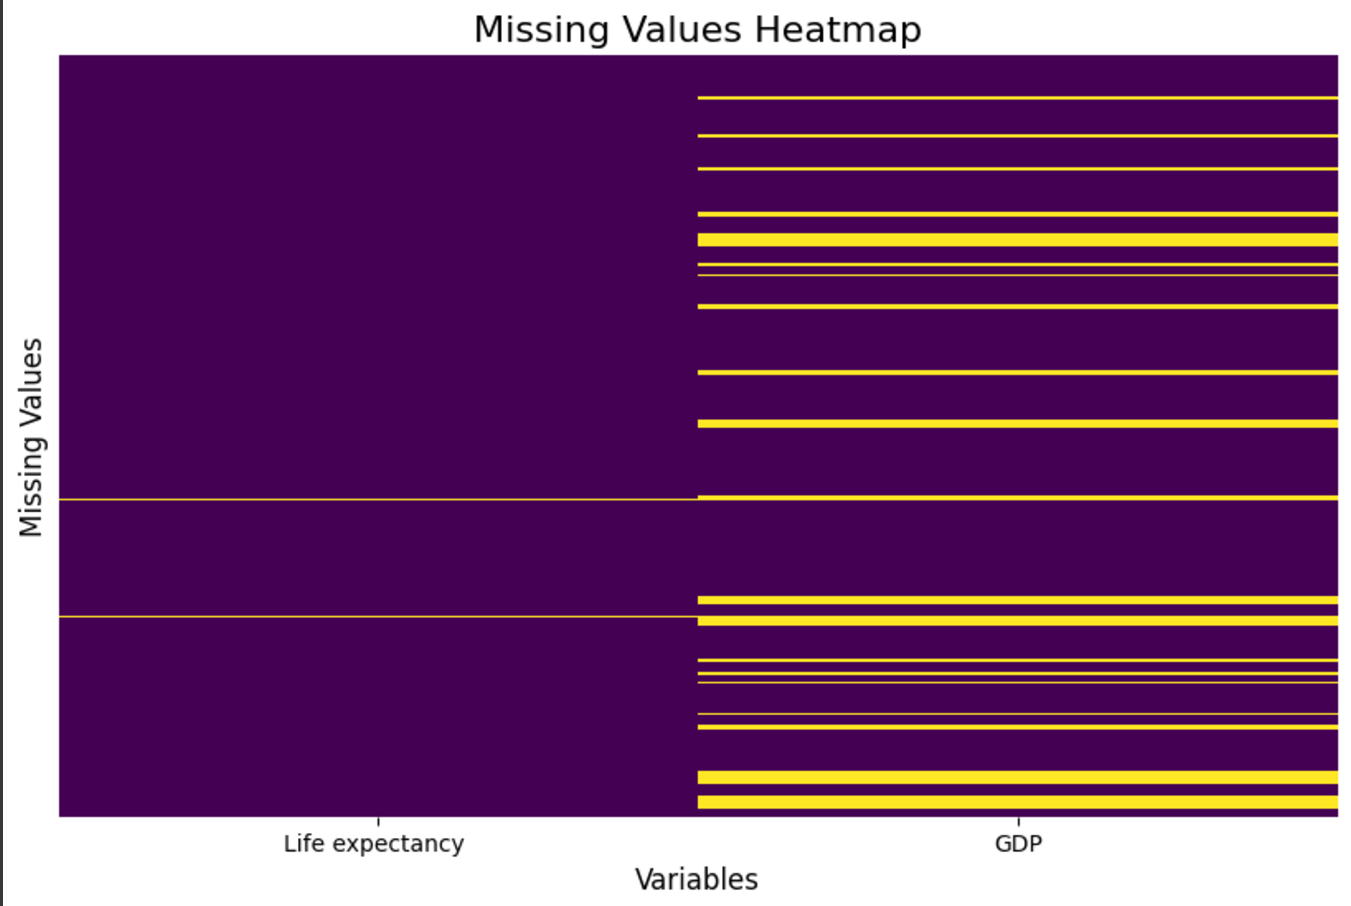

### Informa√ß√£o Visual de Valores em falta das variaveis referidas antes do tratamento.


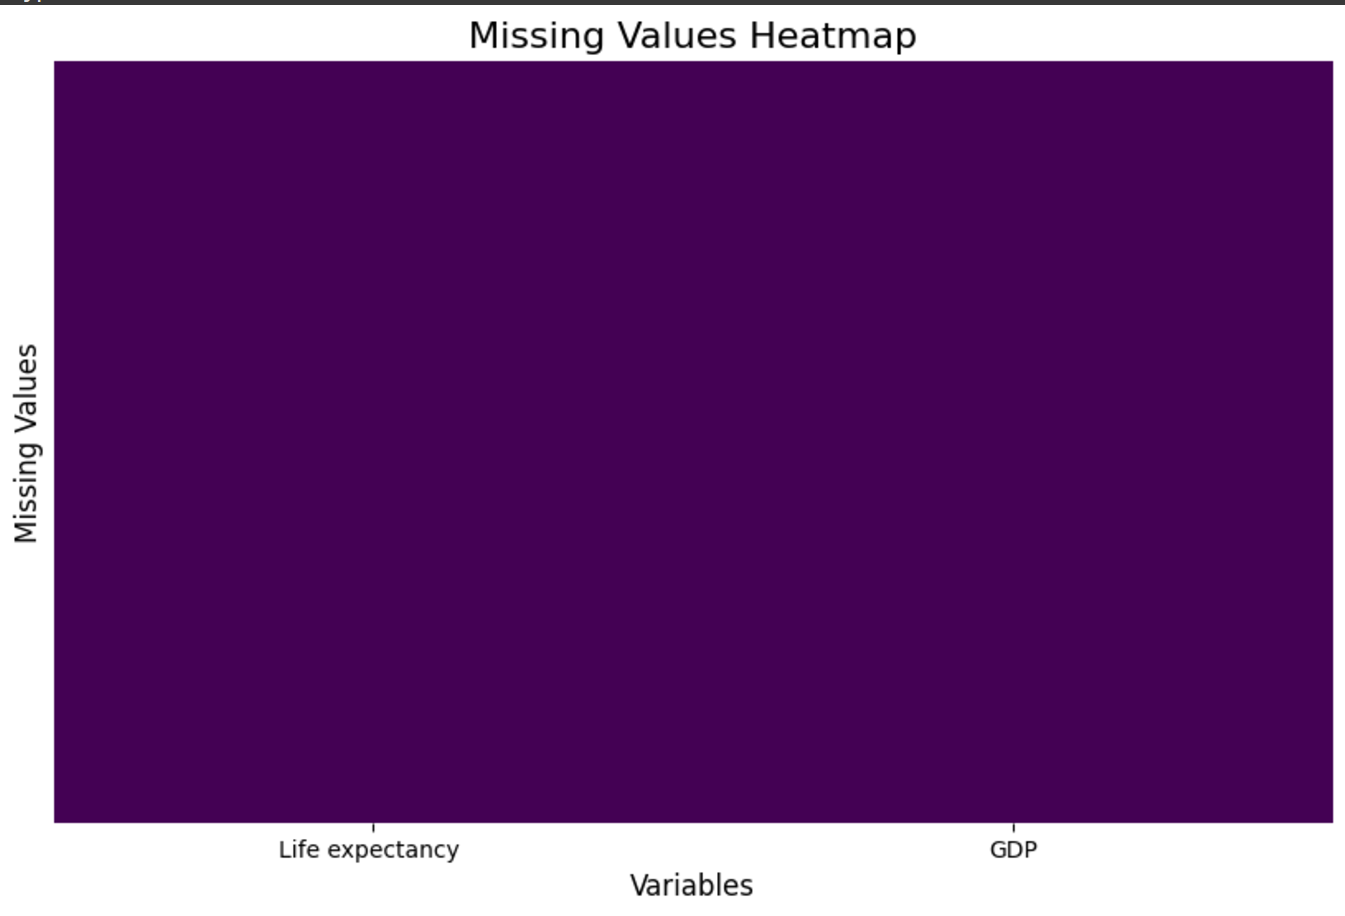

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


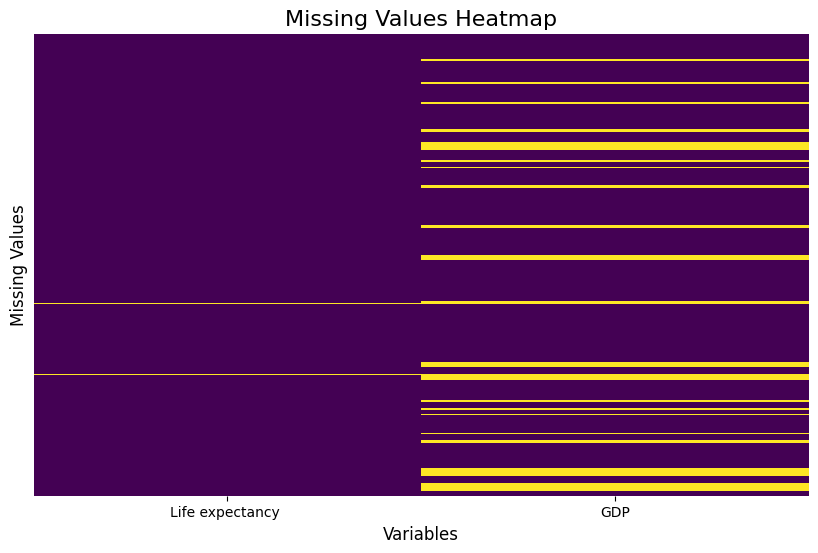

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


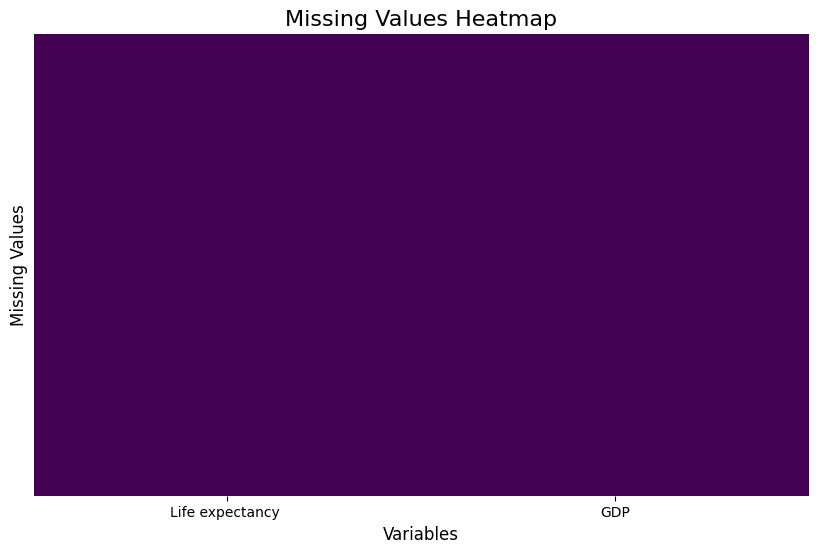

In [78]:
### Fun√ß√µes criadas para tratamento dos dados
def fill_missing_values_average(columns_to_impute_mean,columns_group):
  """
  Function fills NaN values ‚Äã‚Äãwith the average of grouped dataframe columns.

  Parameters
  ----------
  columns_to_impute_mean : list
    Columns that have their NaN values ‚Äã‚Äãreplaced by the mean.
  columns_group : list
    Columns being used to group the average.

  Returns
  -------
  None

  Examples
  --------
  >>> fill_missing_values_average(['var1','var2'],['var3','var4'])
  """
  for col in columns_to_impute_mean:
    #Preencher com m√©dia das colunas agrupadas
    df[col] = df.groupby(columns_group)[col].transform(
        lambda x: x.fillna(x.mean())
        )
    df[col].fillna(df[col].mean())  # Preencher restantes com a m√©dia global

def fill_missing_values_lin_interpolation(columns_to_interpolate,columns_group):
  """
  Function fills NaN values using linear interpolation for the specified columns.

  Parameters
  ----------
  columns_to_interpolate : list
    Columns for which NaN values will be interpolated linearly.
  columns_group : list
    Columns that will be used for grouping before applying interpolation.

  Returns
  -------
  None

  Examples
  --------
  >>> fill_missing_values_lin_interpolation(['var1','var2'],['var3','var4'])
  """
  for col in columns_to_interpolate:
    df[col] = df.groupby(columns_group)[col].transform(
    lambda x: x.interpolate(method='linear'))

### Fun√ß√£o criada para cria√ß√£o Visual HeatMap
def generate_heatmap_missing_values(columns_to_check,title,xlabel,ylabel):
  """
  Fuction creates a heatmap to visualize the distribution of missing values ‚Äã‚Äã

  Parameters
  ----------
  columns_to_check : list
    A list of dataframe columns that will be analyzed.
  title : str
    HeatMap Title
  xlabel : str
    The x-axis label.
  ylabel : str
    The y-axis label.

  Returns
  -------
  None
  """

  heatmap_data = df[columns_to_check].isna()
  # Criar o mapa de calor
  plt.figure(figsize=(10, 6))
  sns.heatmap(heatmap_data, cmap='viridis', cbar=False, yticklabels=False)
  plt.title(title, fontsize=16)
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel(ylabel, fontsize=12)
  plt.show()

# Visualiza√ß√£o Valores em Falta, variaveis selecionadas antes de tratamento
print(df.isnull().sum())
columns_to_check_missing_values = ['Life expectancy ','GDP']
generate_heatmap_missing_values(columns_to_check_missing_values,'Missing Values Heatmap','Variables','Missing Values')

# 1.Tentativa de Preencher Valores em falta atrav√©s Interpora√ß√£o Temporal
columns_to_interpolate = ['Life expectancy ','GDP']
columns_group = ['Country']
fill_missing_values_lin_interpolation(columns_to_interpolate,columns_group)

# 2.Tentativa de Preencher Valores em falta atrav√©s m√©dia agrupada
columns_to_impute_mean = ['Life expectancy ','GDP']
columns_group = ['Year', 'Status']
fill_missing_values_average(columns_to_impute_mean,columns_group)

# Visualiza√ß√£o Valores em Falta, variaveis selecionadas p√≥s tratamento
print(df.isnull().sum())
columns_to_check_missing_values = ['Life expectancy ','GDP']
generate_heatmap_missing_values(columns_to_check_missing_values,'Missing Values Heatmap','Variables','Missing Values')



# Qual o pa√≠s com maior percentagem de crescimento entre 2000 e 2015 em termos de esperan√ßa m√©dia de vida (Life Expectancy)?



---



A fun√ß√£o calculate_highest_life_expectancy_growth permite calcular o crescimento percentual da vari√°vel 'Esperan√ßa M√©dia de Vida' de diferentes pa√≠ses entre dois anos espec√≠ficos e identificar o pa√≠s que apresentou o maior crescimento.

O pa√≠s que apresentou o maior crescimento foi Zimbabwe com um crescimento percentual na ordem dos 45,65%

Abaixo, s√£o apresentados os 10 pa√≠ses com a maior taxa de crescimento da 'Esperan√ßa M√©dia de Vida'.

Pa√≠s com maior crescimento: Zimbabwe
Crescimento percentual: 45.65%


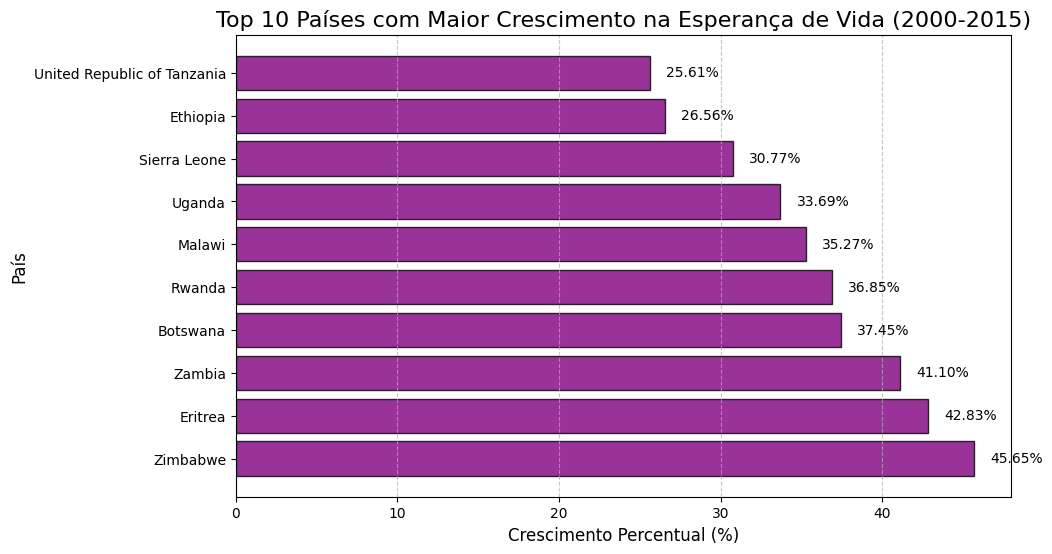

In [79]:
def calculate_highest_life_expectancy_growth(df, year_start=2000, year_end=2015):
    """
    Calculate the country with the highest life expectancy growth between two specified years.

    Parameters
    ----------
    df : pandas.DataFrame
        A DataFrame containing life expectancy data. The DataFrame should have the
        following columns: 'Country', 'Year', 'Life expectancy '.
    year_start : int, optional
        The starting year for the calculation. Defaults to 2000.
    year_end : int, optional
        The ending year for the calculation. Defaults to 2015.

    Returns
    -------
    highest_growth_country : str
        The name of the country with the highest life expectancy growth.
    highest_growth_value : float
        The growth in life expectancy for the country with the highest growth.
    growth : pandas.DataFrame
        A DataFrame with the growth in life expectancy for each country.
    """
    # Filtrar os dados para os anos especificados
    df_filtered = df[df['Year'].isin([year_start, year_end])]

    # Criar tabela piv√¥ com as colunas de interesse
    growth = df_filtered.pivot(index='Country', columns='Year', values='Life expectancy ')

    # Calcular o crescimento percentual
    growth['Growth (%)'] = ((growth[year_end] - growth[year_start]) / growth[year_start]) * 100

    # Identificar o pa√≠s com maior crescimento
    highest_growth_country = growth['Growth (%)'].idxmax()
    highest_growth_value = growth['Growth (%)'].max()

    return highest_growth_country, highest_growth_value, growth


def plot_top_countries_growth(growth_df, top_n=10):
    """
    Plot a bar chart showing the top n countries with the highest growth rate in
    life expectancy between 2000 and 2015.

    Parameters
    ----------
    growth_df : pandas DataFrame
        A DataFrame with the growth rate of life expectancy for each country.
    top_n : int, optional
        The number of countries to show in the chart. Defaults to 10.
    """

    # Obter os pa√≠ses com maior crescimento percentual
    top_countries = growth_df.nlargest(top_n, 'Growth (%)')

    # Preparar dados para gr√°fico
    countries = top_countries.index
    growth_values = top_countries['Growth (%)']

    # Criar o gr√°fico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(countries, growth_values, color='purple', alpha=0.8, edgecolor='black')
    plt.title(f'Top {top_n} Pa√≠ses com Maior Crescimento na Esperan√ßa de Vida (2000-2015)', fontsize=16)
    plt.xlabel('Crescimento Percentual (%)', fontsize=12)
    plt.ylabel('Pa√≠s', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Adicionar valores ao lado das barras
    for i, v in enumerate(growth_values):
        plt.text(v + 1, i, f"{v:.2f}%", va='center', fontsize=10)

    plt.show()


# Calcular o maior crescimento e obter o DataFrame de crescimento
highest_growth_country, highest_growth_value, growth = calculate_highest_life_expectancy_growth(df)

print(f"Pa√≠s com maior crescimento: {highest_growth_country}")
print(f"Crescimento percentual: {highest_growth_value:.2f}%")

# Gerar o gr√°fico para os 10 pa√≠ses com maior crescimento
plot_top_countries_growth(growth, top_n=10)



# O PIB (GDP) dos pa√≠ses em 2015 √© superior ao que era em 2000? Faz o teste estat√≠stico e explica o porqu√™ de ter escolhido esse teste e os passos que fizeste.


---




O teste estat√≠stico aplicado foi o Teste t para Amostras Dependentes, que √© utilizado para comparar as m√©dias de dois conjuntos de dados emparelhados. Neste caso, analisou-se o PIB de 2015 e 2000 para os mesmos pa√≠ses.

Hip√≥teses:

*   Hipotese Nula: O PIB dos paises em 2015 √© menor ou igual aos de 2000.
*   Hipotese Alternativa: O PIB dos paises em 2015 s√£o maior que no ano 2000.









**Resultados do Teste:**


---



Estat√≠stica do teste t: 3.5808688, esta medida reflete o desvio da diferen√ßa da m√©dia observada em rela√ß√£o √† hip√≥tese nula, ajustado pelo erro padr√£o das diferen√ßas. Portanto o valor de 3.5808688 indica que a diferen√ßa observada entre o PIB m√©dio de 2015 e 2000 est√° a 3.58 desvios padr√£o acima da expectativa assumida pela hip√≥tese nula (ou seja, que n√£o h√° crescimento significativo no PIB m√©dio).
O facto do sinal ser positivo de reflete que a m√©dia do PIB em 2015 √© maior do que a de 2000, em linha com a hip√≥tese alternativa.

Como p-valor‚âà 0.00022 < 0.05 , rejeitamos
hipote nula com um n√≠vel de confian√ßa de 95%.

Com base no teste estat√≠stico e na an√°lise gr√°fica:
O PIB m√©dio dos pa√≠ses em 2015 √© significativamente maior do que em 2000.
A diferen√ßa m√©dia positiva (2527 USD) e a distribui√ß√£o centrada em valores positivos corroboram esta conclus√£o.

Este resultado sugere que, em geral, houve crescimento econ√≥mico global significativo entre 2000 e 2015. Contudo, a dispers√£o no gr√°fico tamb√©m indica que alguns pa√≠ses tiveram desempenhos vari√°veis (com crescimentos menores ou at√© mesmo decr√©scimos de pib).



2527.652947662175 3.5808688044191106 0.0002196359837714995


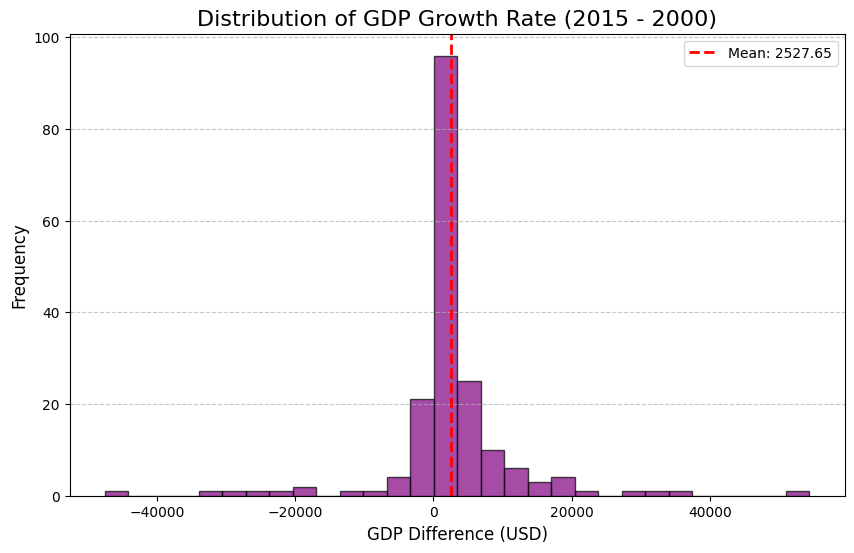

3.5808688044191106 0.0002196359837714995
Rejeitamos a hip√≥tese nula. O PIB dos paises no ano 2015 √© maior que no ano 2000.


In [80]:
# Filtrar os dados para os anos 2000 e 2015
gdp_filtered = df[df['Year'].isin([2000, 2015])].pivot(index='Country', columns='Year', values='GDP')

# Calcular a diferen√ßa entre PIB de 2015 e 2000 para cada pa√≠s
gdp_filtered['Difference'] = gdp_filtered[2015] - gdp_filtered[2000]

# Calcular a m√©dia da diferen√ßa
mean_difference = gdp_filtered['Difference'].mean()

# Teste t para amostras dependentes (pares)
t_statistic, p_value = stats.ttest_rel(gdp_filtered[2015], gdp_filtered[2000], alternative='greater')

print(mean_difference, t_statistic, p_value)

plt.figure(figsize=(10, 6))
plt.hist(gdp_filtered['Difference'], bins=30, alpha=0.7, edgecolor='black',color='purple')
plt.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_difference:.2f}")
plt.title('Distribution of GDP Growth Rate (2015 - 2000)', fontsize=16)
plt.xlabel('GDP Difference (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Alternativa do teste em cima com o ttest1Samp
alpha = 0.05
stat_1samp, p_value_1samp = stats.ttest_1samp(gdp_filtered['Difference'], 0, alternative='greater')
print(stat_1samp, p_value_1samp)


if p_value < alpha and p_value_1samp < alpha:
    print("Rejeitamos a hip√≥tese nula. O PIB dos paises no ano 2015 √© maior que no ano 2000.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncia suficiente para concluir que o PIB dos paises no ano 2015 √© maior que no ano 2000.")


# A esperan√ßa m√©dia de vida num pa√≠s em desenvolvimento √© a mesma que num pa√≠s desenvolvido? Faz o teste estat√≠stico e explica o porqu√™ de ter escolhido esse teste e os passos que fizeste.


---

O teste estat√≠stico aplicado foi o Teste t para Amostras Independentes, que √© utilizado para comparar as m√©dias de dois conjuntos de dados independentes. Neste caso, analisou-se a vari√°vel Esperan√ßa m√©dia de Vida dum pais em desenvolvimento com um pais desenvolvido.

Hip√≥teses:

*   Hipotese Nula: Esperan√ßa de M√©dia de Vida num pais em Desenvolvimento √© a igual √† Esperan√ßa M√©dia de Vida num pais Desenvolvido;
*   Hipotese Alternativa: Esperan√ßa de M√©dia de Vida num pais em Desenvolvimento √© diferente que num pais Desenvolvido.




Este teste foi escolhido porque estamos a comparar a m√©dia de duas popula√ß√µes independentes:
Pa√≠ses desenvolvidos.
Pa√≠ses em desenvolvimento.


No teste t para amostras independentes, caso as vari√¢ncias dos grupos sejam significativamente diferentes e n√£o definamos o par√¢metro "equal_var=False", o teste t assume erroneamente que as vari√¢ncias s√£o iguais. Isto pode levar a p-valores incorretos e, consequentemente, a decis√µes erradas sobre as hip√≥teses. Assim, adicionalmente, foi utilizado o teste de Levene, que verifica a homogeneidade das vari√¢ncias das amostras independentes. Consoante o resultado deste, √© ajustado o par√¢metro "equal_var" no teste t.

**Output:**

M√©dia de Esperan√ßa de Vida (pa√≠ses desenvolvidos): 79.20 anos.
M√©dia de Esperan√ßa de Vida (pa√≠ses em desenvolvimento): 67.11 anos.
Estat√≠stica do teste: 47.93
p-valor:0

**Conclus√£o**


---



Sendo o p-valor igual a zero, rejeitamos a hip√≥tese nula. A m√©dia das duas amostras indepedentes s√£o diferentes.

Conclu√≠mos assim estatisticamente que a esperan√ßa m√©dia de vida num pa√≠s em desenvolvimento n√£o √© a mesma que num pa√≠s desenvolvido!







In [81]:
# Filtrar os dados para pa√≠ses desenvolvidos e em desenvolvimento
developed = df[df['Status'] == 'Developed']['Life expectancy ']
developing = df[df['Status'] == 'Developing']['Life expectancy ']

# Utiliza√ß√£o de teste levene, para verificar a homogeneidade de vari√¢ncias entre as amostras independentes.
alpha= 0.05
stat_levene, p_value_levene = stats.levene(developed, developing)
print(stat_levene, p_value_levene)
if p_value_levene < alpha:
    equal_group_variances = False
else:
    equal_group_variances = True

# Teste estat√≠stico: Teste t de Student para amostras independentes
stat, p_value = stats.ttest_ind(developed, developing,equal_var=equal_group_variances)

if p_value < alpha:
    print("Rejeitamos a hip√≥tese nula. As m√©dias das popula√ß√µes s√£o diferentes.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncia suficiente para concluir As m√©dias das popula√ß√µes s√£o diferentes.")

print(developed.mean(), developing.mean(), stat, p_value)

280.0369280598758 4.1224696746741854e-60
Rejeitamos a hip√≥tese nula. As m√©dias das popula√ß√µes s√£o diferentes.
79.1978515625 67.12021614627409 47.934842925730884 0.0
